In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate
from matplotlib import pyplot as plt
from matplotlib import rcParams
from utils import unit
file = './result/'
# mol = 'ttm3ncz/'
mol = 'hhcrqpp2/'
# mol = 'mttm2/'
# mol = 'ttm/'
# mol = 'bispytm/'

In [2]:
def UVvis(*args, labels, colors, fwhm=0.3, title='UVspec', minx=300, maxx=700, maxy2=1, norm=False):
    in_num = len(args)//2
    nlabel = 0  # set legend row variable
    assert in_num == len(labels), "input data and label must have same length"
    for l in labels:
        if 'Exp.' in l:
            in_num -= 1
    # minx = np.inf
    # maxx = -np.inf
    # for i in range(in_num):
    #     if min(args[2*i]) < minx:
    #         minx = min(args[2*i])
    #     if max(args[2*i]) > maxx:
    #         maxx = max(args[2*i])
    x = np.linspace(minx - 25, maxx + 25, 1000)  # nm as unit
    y = np.zeros((x.shape[0], in_num))

    def gaussian(x, x0, A, fwhm):
        wavenum = 1 / (unit.eVxnm / fwhm)
        return 1.3062974e8 * A / (1e7*wavenum) * np.exp(-((1/x - 1/x0)/(1*wavenum))**2)

    for i in range(in_num):
        for pos, height in zip(args[2*i], args[2*i+1]):
            y[:, i] += gaussian(x, pos, height, fwhm)
        if norm:
            y[:, i] = y[:, i] / np.max(y[:, i])  # ttm3ncz

    fig, ax = plt.subplots(figsize=(8, 5))
    ax2 = ax.twinx()
    for i, l, c in zip(range(in_num), labels, colors):
        ax.plot(x, y[:, i], color=c, lw=1.5, label=l)
        nlabel += 1
    maxy = -101  # must smaller than 0
    for i in range(len(labels)-in_num):
        ax.plot(args[2*in_num+2*i], args[2*in_num+2*i+1], color=colors[in_num+i], lw=1.5, label=labels[in_num+i])
        maxy = np.max((maxy, np.max(args[2*in_num+2*i+1])))
        nlabel += 1
    # peak position
    for i in range(in_num):
        for j, (pos, height) in enumerate(zip(args[2*i], args[2*i+1])):
            ax2.vlines(pos, 0, height, color=colors[i], linestyle="dashed", alpha=0.6,
                       label=labels[i] if j == 0 else None)
        nlabel += 1
    # for i, (pos, height) in enumerate(zip(args[0], args[1])):
    #     ax2.vlines(pos, 0, height, color=colors[0], linestyle="dashed", alpha=0.6,
    #                label=label[0]+' $f$' if i == 0 else None)  # only for first method 
    ax2.set_ylabel("$f$", fontsize=15)
    ax2.tick_params(axis="both", which="major", labelsize=15)
    ax2.set_ylim([0, maxy2])

    ax.set_xlim(min(x), max(x))
    ax.set_xlabel("wavelength (nm)", fontsize=15)
    # ax.set_ylabel(r"$\epsilon$ / $M^{-1}cm^{-1}$", fontsize=15)
    if norm:
        ax.set_ylabel(r"norm. $\epsilon$", fontsize=15)  # ttm3ncz
    else:
        ax.set_ylabel(r"$\epsilon$ / $M^{-1}cm^{-1}$", fontsize=15)  # ttm3ncz
    ax.tick_params(axis="both", which="major", labelsize=15)
    maxy = np.max((maxy, np.max(y)))
    print(maxy)
    if not norm:
        # maxy = 41476.99925456449  # ttm fwhm=0.2
        # maxy = 108106.66438103361  # ttm3ncz fwhm=0.3
        # maxy = 62891.109187797156  # ttm3ncz fwhm=0.2
        # maxy = 31545.470528723043  # bispytm fwhm=0.3
        # maxy = 29125.924840564476  # bispytm fwhm=0.2
        # maxy = 83331.98247503756  # mttm2 fwhm=0.2
        maxy = 70018.44883471262  # hhcrqpp2 fwhm=0.2  row=300
        # maxy = 97787.2980341505  # hhcrqpp2 fwhm=0.2  row=400
        # maxy = 152955.65977044945  # hhcrqpp2 fwhm=0.2  row=500
    ax.set_ylim([0, 1.1*maxy])
    ax.grid(True, linestyle="--", alpha=0.5)
    # # combine legend
    # lines1, labels1 = ax.get_legend_handles_labels()
    # lines2, labels2 = ax2.get_legend_handles_labels()
    # ax.legend(lines1 + lines2, labels1 + labels2, fontsize=15, loc='upper right')
    ax.legend(fontsize=15)
    
    # all_lines = lines1 + lines2
    # all_labels = labels1 + labels2
    # ax.legend(all_lines, all_labels,
    #       loc='lower center',
    #       bbox_to_anchor=(0.5, 1.02),
    #       ncol=np.ceil(nlabel/2),
    #       columnspacing=1.5,
    #       handlelength=2,
    #       fontsize=15)
    plt.show()
    fig.savefig(title + '.eps', dpi=600, bbox_inches='tight')
    fig.savefig(title + '.svg', dpi=600, bbox_inches='tight')
    

62891.109187797156


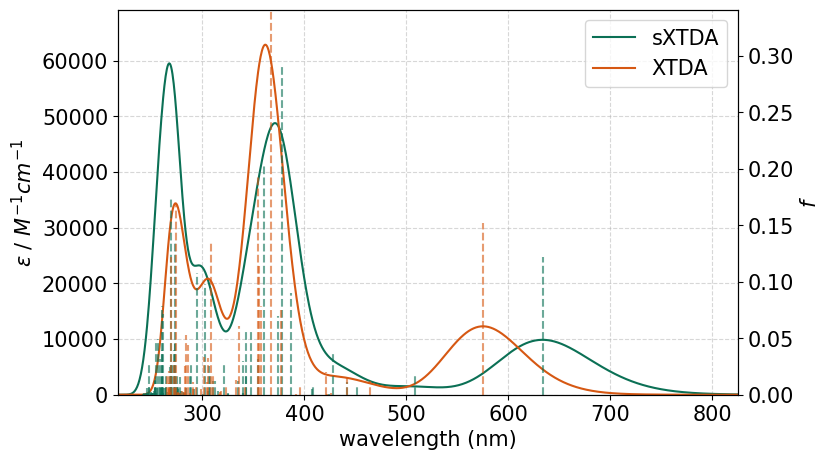

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


59650.274841348495


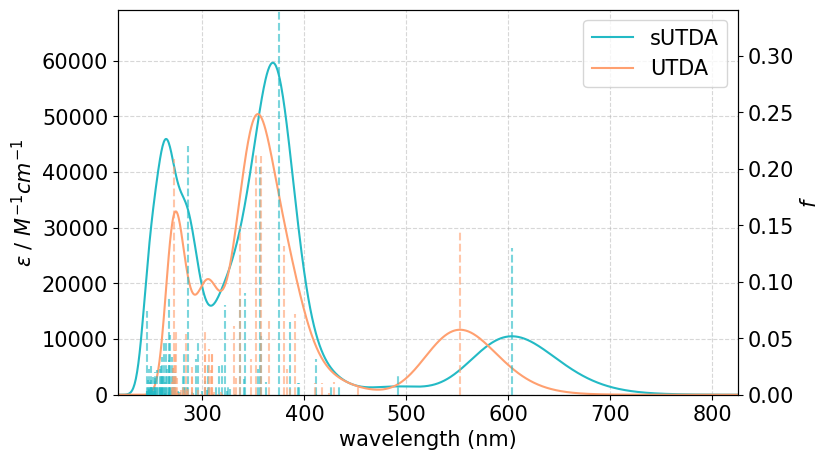

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1.0000285968259484


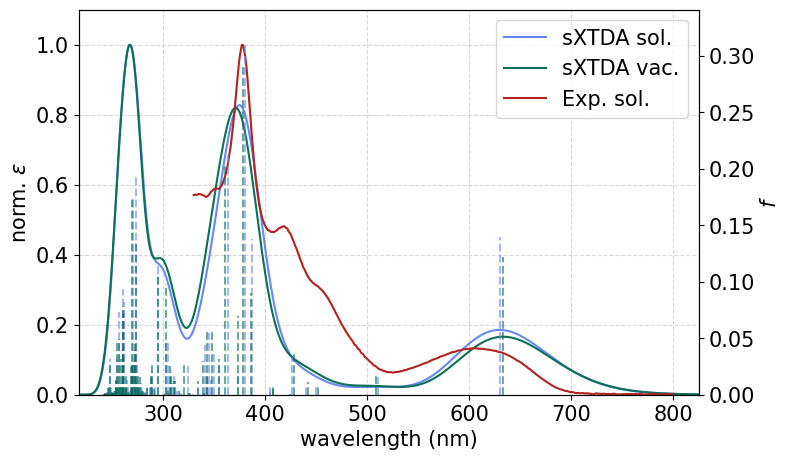

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1.0000285968259484


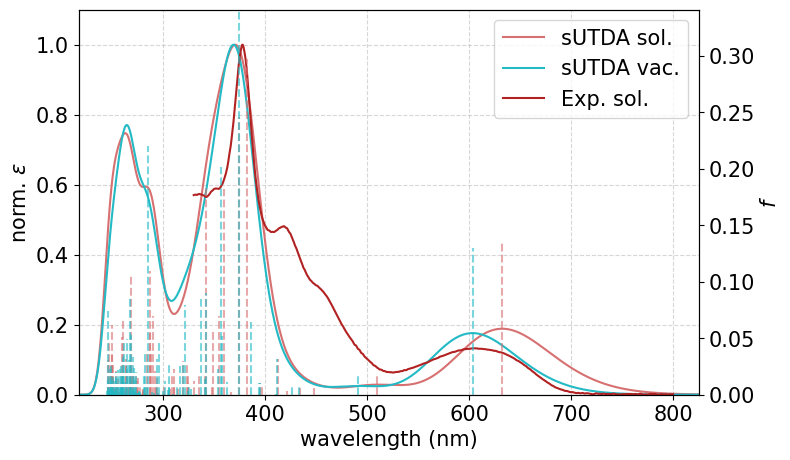

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [3]:
# in .csv file, first column is wavelength (unit is Angstrom), second column oscillator strength in length form
# if first column is energy (unit is eV), use `unit.eVxnm` transform to wavelength. And energy unit is Hartree can use `unit.ha2eV` transform to eV then transform to wavelength
# colors = rcParams["axes.prop_cycle"].by_key()["color"]
# colors = ["#7895C1", "#8074C8", "#992224", "#A8CBDF", "#B54764", "#D6EFF4", "#E3625D", "#EF8B67", "#F0C284", "#F2FAFC", "#F5EBAE", "#F7FBC9"]
colors = ["#0B7055", "#796CAD", "#D65813", "#23BAC5", "#EECA40", "#FFA070", "#000080", "#B22222", "#6888F5", "#D77071"]
solvent = ''
functional = 'pbe0-st/'
rows = 300
XsTDA = pd.read_csv(file+mol+functional+'XsTDA'+solvent+'.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
e0 = XsTDA[:rows, 0]
os0 = XsTDA[:rows, 1]
ds2_0 = XsTDA[:rows, 2]
# XTDDFT = pd.read_csv(file+mol+functional+'XTDDFT'+solvent+'.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
# e1 = XTDDFT[:, 0]
# os1 = XTDDFT[:, 1]
# ds2_1 = XTDDFT[:, 2]
XTDA = pd.read_csv(file+mol+functional+'XTDA'+solvent+'.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
e2 = XTDA[:,0]
os2 = XTDA[:,1]
ds2_2 = XTDA[:, 2]
UsTDA = pd.read_csv(file+mol+functional+'UsTDA'+solvent+'.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
e3 = UsTDA[:rows, 0]
os3 = UsTDA[:rows, 1]
ds2_3 = UsTDA[:rows, 2]
# UTDDFT = pd.read_csv(file+mol+functional+'UTDDFT'+solvent+'.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
# e4 = UTDDFT[:, 0]
# os4 = UTDDFT[:, 1]
# ds2_4 = UTDDFT[:, 2]
UTDA = pd.read_csv(file+mol+functional+'UTDA'+solvent+'.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
e5 = UTDA[:,0]
os5 = UTDA[:,1]
ds2_5 = UTDA[:, 2]
# experiment = pd.read_csv(file+mol+'experiment'+solvent+'.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
# e6 = experiment[:,0]
# # os6 = experiment[:,1]*1e4  # czbtm
# os6 = experiment[:, 1]
# int6 = interpolate.interp1d(e6,os6,kind='cubic')
# e6 = np.linspace(min(e6), max(e6), 1000)
# os6 = int6(e6)

# solvent = 'cyclohexane-'
solvent = '-TOLUENE'
# solvent = '-ACETONITRILE'
XsTDA_gsol = pd.read_csv(file+mol+functional+'XsTDA'+solvent+'.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
e8 = XsTDA_gsol[:rows, 0]
os8 = XsTDA_gsol[:rows, 1]
rs8 = XsTDA_gsol[:rows, 2]
ds2_8 = XsTDA_gsol[:rows, 2]
# # no use, XsTDA with solvent effect just add solvent in ground process, but XTDA and XTDDFT with solvent effect add solvent in excited process
# XTDDFT_sol = pd.read_csv(file+mol+solvent+'XTDDFT.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
# e10 = XTDDFT_sol[:, 0]
# os10 = XTDDFT_sol[:, 1]
# XTDA_sol = pd.read_csv(file+mol+'XTDA'+solvent+'.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
# e11 = XTDA_sol[:, 0]
# os11 = XTDA_sol[:, 1]
# rs11 = XsTDA_gsol[:, 2]
UsTDA_gsol = pd.read_csv(file+mol+functional+'UsTDA'+solvent+'.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
e9 = UsTDA_gsol[:rows, 0]
os9 = UsTDA_gsol[:rows, 1]
ds2_9 = UsTDA_gsol[:rows, 2]
# # no use, UsTDA with solvent effect just add solvent in ground process, but UTDA and UTDDFT with solvent effect add solvent in excited process
# UTDDFT_sol = pd.read_csv(file+mol+solvent+'UTDDFT.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
# e11 = UTDDFT_sol[:, 0]
# os11 = UTDDFT_sol[:, 1]
# UTDA_sol = pd.read_csv(file+mol+solvent+'UTDA.csv', sep='[,\s]+', header=None, engine='python').to_numpy()
# e12 = UTDA_sol[:, 0]
# os12 = UTDA_sol[:, 1]
experiment_sol = pd.read_csv(file+mol+functional+'experiment'+solvent+'.csv', sep='[,\s]+', header=None, engine='python').to_numpy()  # one experiment data
# experiment_sol = pd.read_csv(file+mol+"various-sol-"+'experiment.csv', sep='[,\s]+', header=None, engine='python').to_numpy()  # various experiment data
e7 = experiment_sol[:,0]
# os7 = experiment_sol[:,1]*1.25e4  # czbtm
# os7 = experiment_sol[:,1]
os7 = experiment_sol[:,3]  # ttm3ncz
int7 = interpolate.interp1d(e7,os7,kind='cubic')
e7 = np.linspace(min(e7), max(e7), 1000)
os7 = int7(e7)

minx = np.inf
maxx = -np.inf
# for e in [e0, e2, e5, e7, e8, e9]:
# for e in [e8, e7, e11]:
for e in [e7, e8, e9]:  # hhcrqpp2
    if min(e) < minx:
        minx = min(e)
    if max(e) > maxx:
        maxx = max(e)
# maxy2 = np.max(np.concatenate((os0, os1, os2, os3, os4, os5, os8, os9))) * 1.1  # include TDDFT, TDA, sTDA
# maxy2 = np.max(np.concatenate((os0, os2, os5, os8, os9))) * 1.1  # include TDA, sTDA
maxy2 = np.max(np.concatenate((os8, os9))) * 1.1  # hhcrqpp2

# UVvis(e0, os0, e2, os2, e6, os6, labels=['sXTDA', 'XTDA', 'Exp.'], colors=[colors[0],colors[2],colors[6]], title='vacuum-X', fwhm=0.1, minx=minx, maxx=maxx, maxy2=maxy2)
# UVvis(e3, os3, e5, os5, e6, os6, labels=['sUTDA', 'UTDA', 'Exp.'], colors=[colors[3],colors[5],colors[6]], title='vacuum-U', fwhm=0.1, minx=minx, maxx=maxx, maxy2=maxy2)
# # UVvis(e0, os0, e3, os3, e6, os6, labels=['sXTDA', 'sUTDA', 'Exp.'], colors=[colors[0], colors[3], colors[6]], title='vacuum-sTDA')
# # UVvis(e1, os1, e4, os4, e6, os6, labels=['XTDDFT', 'UTDDFT', 'Exp.'], colors=[colors[1], colors[4], colors[6]], title='vacuum-TDDFT')
# # UVvis(e2, os2, e5, os5, e6, os6, labels=['XTDA', 'UTDA', 'Exp.'], colors=[colors[2], colors[5], colors[6]], title='vacuum-TDA')
# UVvis(e8, os8, e0, os0, e7, os7, e6, os6, labels=['sXTDA sol.', 'sXTDA vac.', 'Exp. sol.', 'Exp. gas'], colors=[colors[8],colors[0],colors[7],colors[6]], title='solvent-sXTDA', fwhm=0.1, minx=minx, maxx=maxx, maxy2=maxy2)
# UVvis(e9, os9, e3, os3, e7, os7, e6, os6, labels=['sUTDA sol.', 'sUTDA vac.', 'Exp. sol.', 'Exp. gas'], colors=[colors[9],colors[3],colors[7],colors[6]], title='solvent-sUTDA', fwhm=0.1, minx=minx, maxx=maxx, maxy2=maxy2)

# no vacuum experiment
UVvis(e0, os0, e2, os2, labels=['sXTDA', 'XTDA'], colors=[colors[0],colors[2]], title='vacuum-X', minx=minx, maxx=maxx, maxy2=maxy2, fwhm=0.2)
UVvis(e3, os3, e5, os5, labels=['sUTDA', 'UTDA'], colors=[colors[3],colors[5]], title='vacuum-U', minx=minx, maxx=maxx, maxy2=maxy2, fwhm=0.2)
# UVvis(e0, os0, e3, os3, labels=['sXTDA', 'sUTDA'], colors=[colors[0], colors[3], colors[6]], title='vacuum-sTDA', maxy2=maxy2, fwhm=0.1)
UVvis(e8, os8, e0, os0, e7, os7, labels=['sXTDA sol.', 'sXTDA vac.', 'Exp. sol.'], colors=[colors[8],colors[0],colors[7]], title='solvent-sXTDA', fwhm=0.2, minx=minx, maxx=maxx, maxy2=maxy2, norm=True)
UVvis(e9, os9, e3, os3, e7, os7, labels=['sUTDA sol.', 'sUTDA vac.', 'Exp. sol.'], colors=[colors[9],colors[3],colors[7]], title='solvent-sUTDA', fwhm=0.2, minx=minx, maxx=maxx, maxy2=maxy2, norm=True)
# UVvis(e8, os8, e7, os7, labels=['sXTDA', 'Exp.'], colors=[colors[8], colors[7]], title='sol-X', minx=minx, maxx=maxx, maxy2=maxy2, fwhm=0.2)
# UVvis(e9, os9, e7, os7, labels=['sUTDA', 'Exp.'], colors=[colors[9], colors[7]], title='sol-U', minx=minx, maxx=maxx, maxy2=maxy2, fwhm=0.2)

In [4]:
def deltaS2(*args, labels, colors, title, maxx, minx):
    fig, ax = plt.subplots(figsize=(8, 5))
    # for i, c, l in zip(range(len(args)), colors, labels):
    #     ax.bar(args[2*i], args[2*i+1], width=1.5, label=l, color=c)
    # ax.scatter(args[0], args[1], label=labels[0], color=colors[0])
    # ax.plot(args[0], args[1], '.-', label=labels[0], color=colors[0])
    ax.bar(args[0], args[1], width=1.5, label=labels[0], color=colors[0])
    # ax.set_xlim(0, len(args[0])+1)
    ax.set_ylim(0, 2.1)
    ax.set_xlim(minx-25, maxx+25)
    ax.set_xlabel('state', fontsize=15)
    ax.set_ylabel(r'$\Delta S^2$', fontsize=15)
    ax.legend(fontsize=15)
    ax.tick_params(axis="both", which="major", labelsize=15)
    # lines, labels_all = ax.get_legend_handles_labels()
    # ax.legend(lines, labels_all,
    #           loc='lower center',
    #           bbox_to_anchor=(0.5, 1.02),
    #           ncol=len(labels),
    #           fontsize=15,
    #           handlelength=2,
    #           columnspacing=1.5)
    plt.show()
    fig.savefig(title + '.eps', dpi=600, bbox_inches='tight')
    fig.savefig(title + '.svg', dpi=600, bbox_inches='tight')

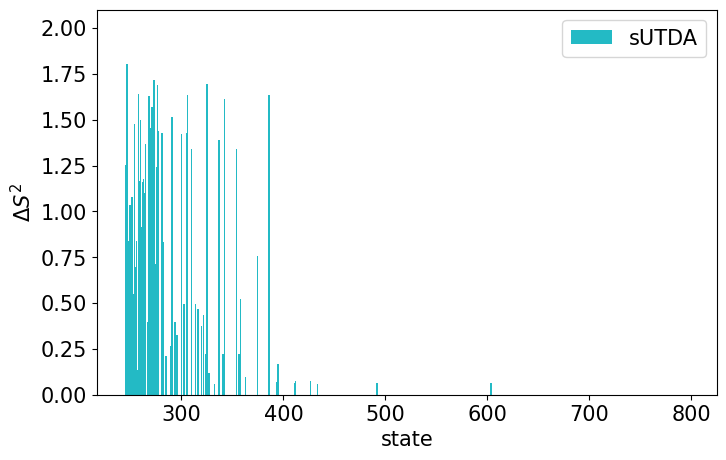

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


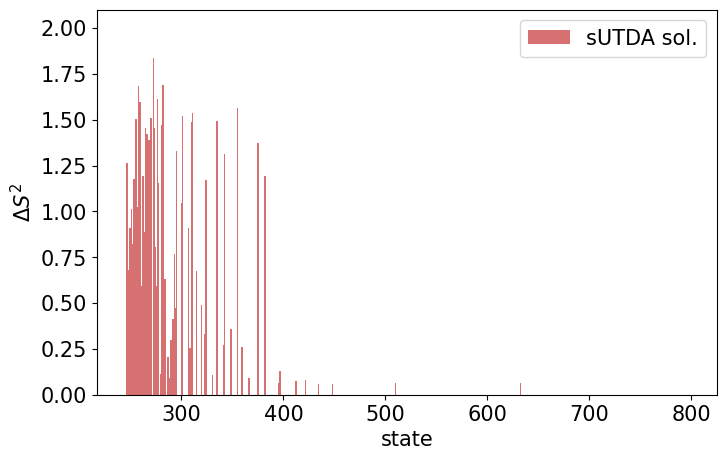

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [5]:
# \delta S^2
# deltaS2(ds2_0, ds2_3, labels=['sXTDA', 'sUTDA'], colors=[colors[0], colors[3]], title='vacuum-sTDA-ds2')
# deltaS2(ds2_8, ds2_9, labels=['sXTDA sol.', 'sUTDA sol.'], colors=[colors[8], colors[9]], title='solvent-sTDA-ds2')
deltaS2(e3, ds2_3, labels=['sUTDA'], colors=[colors[3]], title='vacuum-sTDA-ds2', maxx=maxx, minx=minx)
deltaS2(e9, ds2_9, labels=['sUTDA sol.'], colors=[colors[9]], title='solvent-sTDA-ds2', maxx=maxx, minx=minx)

In [6]:
def ene_level(e0, e1, colors, title, labels):
        
    # x 坐标
    x_sXTDA = 0
    x_sUTDA = 1
    line_length = 0.4
    
    # 初始化图形
    fig, ax = plt.subplots(figsize=(6, 5))
    plt.rcParams.update({'font.size': 15})
    
    # 画 sXTDA 能级
    for i, energy in enumerate(e0):
        ax.hlines(energy, x_sXTDA - line_length/2, x_sXTDA + line_length/2, color=colors[0], linewidth=2)
        # ax.text(x_sXTDA - 0.3, energy, f'{energy:.2f}', va='center', ha='right', fontsize=15)
    
    # 画 sUTDA 能级
    for i, energy in enumerate(e1):
        ax.hlines(energy, x_sUTDA - line_length/2, x_sUTDA + line_length/2, color=colors[1], linewidth=2)
        # ax.text(x_sUTDA + 0.3, energy, f'{energy:.2f}', va='center', ha='left', fontsize=15)
    
    # 添加连接线（按序号对应）
    for le1, le2 in zip(e0, e1):
        ax.plot([x_sXTDA + line_length/2, x_sUTDA - line_length/2], [le1, le2], color='gray', linestyle='--', linewidth=1)
    
    # 坐标轴设置
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(min(min(e0), min(e1)) - 0.5,
                max(max(e0), max(e1)) + 0.5)
    
    ax.set_xticks([x_sXTDA, x_sUTDA])
    ax.set_xticklabels(labels, fontsize=15)
    ax.set_ylabel('Energy (nm)', fontsize=15)
    # ax.set_title('Excitation Energies Comparison', fontsize=15, pad=10)
    
    # 去除顶部和右侧边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 美化布局
    plt.tight_layout()
    plt.show()
    fig.savefig(title + '.eps', dpi=600, bbox_inches='tight')
    fig.savefig(title + '.svg', dpi=600, bbox_inches='tight')

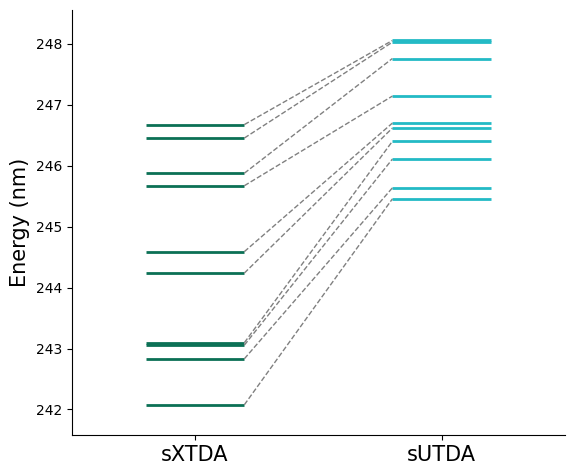

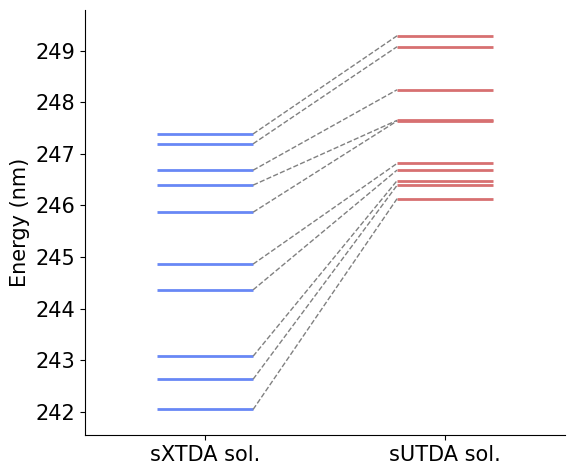

In [7]:
ene_level(e0[-10:], e3[-10:], colors=[colors[0], colors[3]], title='vacuum-sTDA-enelevel', labels=['sXTDA', 'sUTDA'])
ene_level(e8[-10:], e9[-10:], colors=[colors[8], colors[9]], title='solvent-sTDA-enelevel', labels=['sXTDA sol.', 'sUTDA sol.'])

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ===== 读取数据 =====
# 假设你的数据是两列：wavelength(nm) rotatory_strength
# 文件格式示例：
# 300.0   0.0023
# 310.0  -0.0014
solvent = '-ACETONITRILE'
data = pd.read_csv(file+mol+functional+'XsTDA'+solvent+'.csv', sep='[,\s]+', header=None, engine='python').to_numpy()  # one experiment data
data2 = pd.read_csv(file+mol+functional+'experiment'+solvent+'-ecd.csv', sep='[,\s]+', header=None, engine='python').to_numpy()  # one experiment data
# data3 = pd.read_csv(file+mol+functional+solvent+'XTDA.csv', sep='[,\s]+', header=None, engine='python').to_numpy()  # one experiment data
wavelength = data[:rows, 0]  # 波长 (nm)
rot_str = data[:rows, 3]     # 转子强度
wavelength2 = data2[:, 0]
rot_str2 = data2[:, 1]
# int2 = interpolate.interp1d(wavelength2,rot_str2,kind='cubic')
# wavelength2 = np.linspace(min(wavelength2)+4, max(wavelength2), 1000)
# rot_str2 = int7(wavelength2)
# wavelength3 = data3[:, 0]  # 波长 (nm)
# rot_str3 = data3[:, 4]     # 转子强度

# ===== 高斯展宽参数 =====
fwhm = 20.0  # nm 展宽
sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))

# ===== 构造波长轴 =====
wl_min, wl_max = min(wavelength) - 3*fwhm, max(wavelength) + 3*fwhm
wl_grid = np.linspace(wl_min, wl_max, 2000)

# ===== 高斯展宽 =====
ecd_spectrum = np.zeros_like(wl_grid)
for wl, r in zip(wavelength, rot_str):
    ecd_spectrum += r * np.exp(- (wl_grid - wl)**2 / (2 * sigma**2))
ecd_spectrum3 = np.zeros_like(wl_grid)
# for wl, r in zip(wavelength3, rot_str3):
#     ecd_spectrum3 += r * np.exp(- (wl_grid - wl)**2 / (2 * sigma**2))

# ===== 绘图（波长从小到大） =====
plt.figure(figsize=(6, 4))
# plt.plot(wl_grid, ecd_spectrum, wavelength2, rot_str2, wl_grid, ecd_spectrum3)
plt.plot(wl_grid, ecd_spectrum, wavelength2, rot_str2)
plt.xlabel('Wavelength (nm)')
plt.ylabel('ECD Intensity (arb. units)')
plt.title('ECD Spectrum')
plt.xlim(wl_min, wl_max)  # 波长从左到右递增
plt.tight_layout()
plt.show()
plt.savefig('solvent-ecd' + '.eps', dpi=600, bbox_inches='tight')
plt.savefig('solvent-ecd' + '.svg', dpi=600, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: './result/ttm3ncz/pbe0-st/XsTDA-ACETONITRILE.csv'

In [ ]:
min(wavelength2)